In [38]:
import re
import subprocess

def logs():
    nb_workers = len(subprocess.check_output("kubectl get pods | awk '/harvester-worker/{print $1}'", shell=True).decode().strip('\n').split('\n'))
    return [subprocess.check_output("kubectl logs $(kubectl get pods | awk '/harvester-worker/{print $1}' | awk 'FNR==" + str(i+1) + "{print$1}')", shell=True).decode() for i in range(nb_workers)]

In [50]:
time_tasks_workers = [re.findall('(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}).*?Total runtime: (\d+)', log) for log in logs()]

In [51]:
import pandas as pd
dfs = [pd.DataFrame(time_tasks_worker, columns=['date', 'task_duration']) for time_tasks_worker in time_tasks_workers]

In [52]:
for i, df in enumerate(dfs):
    df.date = pd.to_datetime(df.date)
    df.task_duration = df.task_duration.astype(int)
    df.set_index('date', inplace=True)
    df['worker'] = str(i+1)

In [53]:
df = pd.concat(dfs)
df = df.loc[df.index > pd.to_datetime('2022-04-28 18:00')]

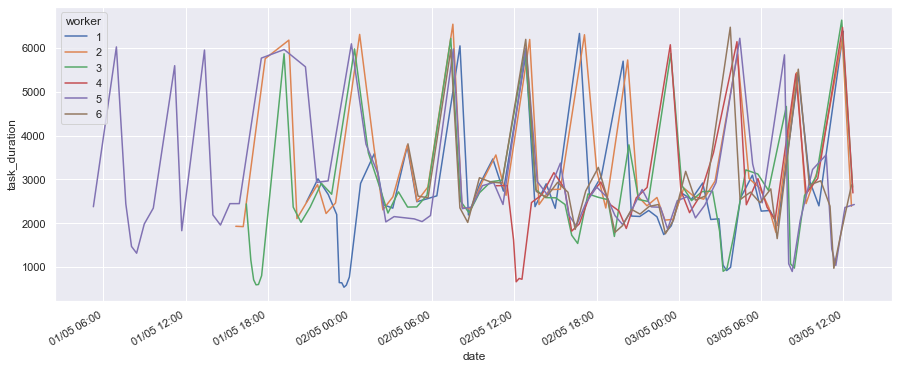

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates

plt.figure(figsize=(15, 6))
sns.set_theme()
ax = sns.lineplot(x="date", y="task_duration",
             hue="worker",
             data=df)
ax.xaxis.set_major_formatter(dates.DateFormatter('%d/%m %H:%M'))
ax.figure.autofmt_xdate()

In [55]:
mean_task_time_per_worker = [(df.query(f'worker=="{i}"').task_duration.mean() // 60) for i in range(1,7)]
print("mean task time for each worker (in minutes)", mean_task_time_per_worker)
mean_task_time_eq = pd.np.mean(mean_task_time_per_worker) / len(mean_task_time_per_worker)
print(f"time per task equivalent {mean_task_time_eq:.2f} min")

mean task time for each worker (in minutes) [44.0, 55.0, 45.0, 46.0, 49.0, 47.0]
time per task equivalent 7.94 min


/Users/antoine.bres/dev/BSO/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
remaining_nb_tasks = 3159
computing_time_left_in_days = mean_task_time_eq * remaining_nb_tasks / 60 / 24
print(f"computing time left {computing_time_left_in_days:.2f} days")

computing time left 17.43 days


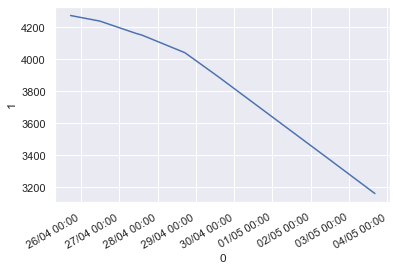

In [57]:
task_progression = pd.DataFrame([
    ('2022-04-25 17:30', 4275),
    ('2022-04-26 11:52', 4240),
    ('2022-04-27 11:04', 4161),
    ('2022-04-27 11:18', 4161),
    ('2022-04-27 14:31', 4151),
    ('2022-04-28 17:07', 4042),
    ('2022-04-29 11:20', 3911),
    ('2022-04-29 15:35', 3880),
    ('2022-05-02 11:21', 3375),
    ('2022-05-03 16:10', 3159),
    
])
task_progression[0] = pd.to_datetime(task_progression[0])
ax = sns.lineplot(x=0, y=1,
             data=task_progression)
ax.xaxis.set_major_formatter(dates.DateFormatter('%d/%m %H:%M'))
ax.figure.autofmt_xdate()

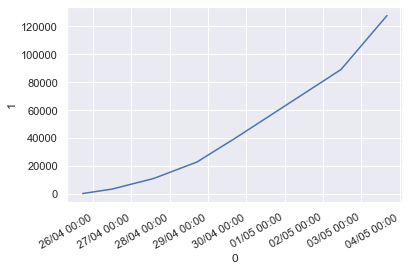

In [58]:
record_progression = pd.DataFrame([
    ('2022-04-25 17:30', 0),
    ('2022-04-26 11:52', 3192),
    ('2022-04-27 11:04', 9947),
    ('2022-04-27 11:18', 9947),
    ('2022-04-27 14:31', 11042),
    ('2022-04-28 17:07', 22623),
    ('2022-04-29 11:20', 35647),
    ('2022-04-29 15:35', 38629),
    ('2022-05-02 11:21', 88982),
    ('2022-05-03 16:10', 127720),
])
record_progression[0] = pd.to_datetime(record_progression[0])
ax = sns.lineplot(x=0, y=1,
             data=record_progression)
ax.xaxis.set_major_formatter(dates.DateFormatter('%d/%m %H:%M'))
ax.figure.autofmt_xdate()